In [5]:
import pandas as pd

In [11]:
df_circa2 = pd.read_excel('data/cyc_analysis_nonzero_circa2.xlsx', sheet_name = 'sig_cyl_gene')
df_circa4 = pd.read_excel('data/cyc_analysis_nonzero_circa4.xlsx', sheet_name = 'sig_cyl_gene')

In [20]:
circa4_gene = set(df_circa4['CycID'])
circa2_gene = set(df_circa2['CycID'])

In [22]:
common_genes = circa4_gene.intersection(circa2_gene)

In [26]:
len(common_genes), len(circa4_gene),len(circa2_gene)

(613, 1789, 1223)

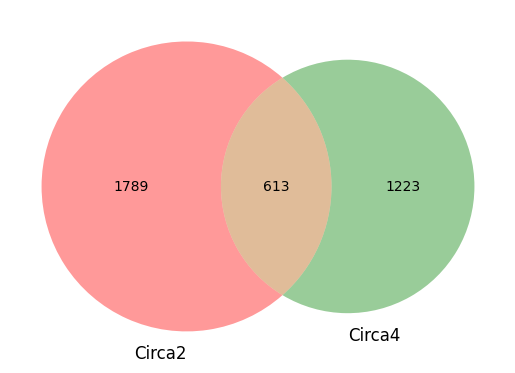

In [29]:
# library
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

# Use the venn2 function
venn2(subsets = (1789, 1223, 613), set_labels = ('Circa2', 'Circa4'))
plt.show()


### Polar plot

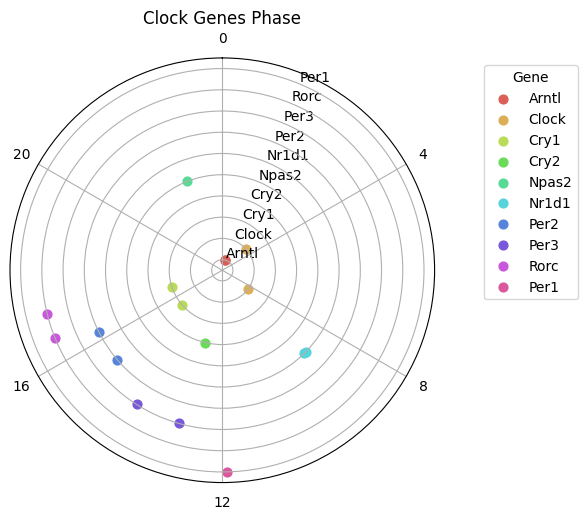

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Sample structure: replace this with your real data
# Each row = one observation of a gene at a specific phase
data = pd.DataFrame({
                    'Gene': ['Arntl', 'Clock', 'Cry1', 'Cry2','Npas2', 'Nr1d1', 'Per2', 'Per3','Rorc',
                            'Arntl','Clock','Cry1','Nr1d1','Per1','Per2','Per3','Rorc'
                            ],
                    'Phase': [1.00, 8.38, 15.31, 12.89, 22.56, 8.96,15.30,13.06,16.54,
                              1.00, 3.15, 16.75, 9.02, 11.92, 16.23, 14.17, 17.06
                            ]
                    })

# Convert phase to radians for polar plot
data['Radians'] = data['Phase'] / 24 * 2 * np.pi

# Assign each gene a numeric ID for radial position (distance from center)
gene_order = data['Gene'].unique()
gene_to_radius = {gene: i for i, gene in enumerate(gene_order, start=1)}
data['Radius'] = data['Gene'].map(gene_to_radius)

# Color palette
palette = sns.color_palette("hls", len(gene_order))
gene_colors = dict(zip(gene_order, palette))
data['Color'] = data['Gene'].map(gene_colors)

# Plot
plt.figure(figsize=(6,6))
ax = plt.subplot(111, polar=True)
ax.set_theta_direction(-1)
ax.set_theta_offset(np.pi / 2.0)
ax.grid(True)

# Scatter plot
for gene in gene_order:
    subset = data[data['Gene'] == gene]
    ax.scatter(subset['Radians'], subset['Radius'], label=gene, color=gene_colors[gene], s=40)

ax.set_yticks(range(1, len(gene_order) + 1))
ax.set_yticklabels(gene_order)
ax.set_ylim(0.5, len(gene_order) + 0.5)
ax.set_xticks(np.linspace(0, 2 * np.pi, 6, endpoint=False))
ax.set_xticklabels(['0', '4', '8', '12', '16', '20'])

plt.title('Clock Genes Phase')
ax.legend(bbox_to_anchor=(1.1, 1.0), loc="upper left", title='Gene')

plt.tight_layout()
plt.show()

### Cell type spe polar

In [30]:
df = pd.read_excel('D:\\MMC_temp\circa2_cyc_siggene_analysis_celltype.xlsx', sheet_name=None)

In [ ]:
df['ABC'].drop

,CycID,JTK_pvalue,JTK_BH.Q,JTK_period,JTK_adjphase,JTK_amplitude,LS_pvalue,LS_BH.Q,LS_period,LS_adjphase,LS_amplitude,meta2d_pvalue,meta2d_BH.Q,meta2d_period,meta2d_phase,meta2d_Base,meta2d_AMP,meta2d_rAMP
0,A2m,0.019907,0.287188,24,1,0.011303,0.224434,1,24.912281,8.070135,0.056420,0.028642,0.409654,24.456140,4.470689,0.051913,0.010748,0.010748
1,Abcb1a,0.014577,0.239253,24,9,0.040576,0.131982,1,26.937669,7.433620,0.907456,0.013955,0.271819,25.468835,8.289549,0.844074,0.040661,0.040661
2,Abcc1,0.001152,0.067843,20,15,0.019883,0.033421,1,20.000000,12.644175,0.151099,0.000430,0.035863,20.000000,13.822087,0.112732,0.040869,0.040869
3,Acaa2,0.001728,0.080861,24,9,0.038252,0.074681,1,21.561822,9.203863,0.317400,0.001285,0.066314,22.780911,9.133542,0.249544,0.041696,0.041696
4,Acaca,0.010552,0.201618,20,9,0.018718,0.260909,1,20.000000,8.688338,0.198900,0.018983,0.318887,20.000000,8.844169,0.180401,0.020445,0.020445
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438,Zbtb46,0.007547,0.167173,24,13,0.014848,0.103282,1,24.184915,14.359671,0.090044,0.006358,0.161886,24.092457,13.677428,0.073692,0.017288,0.017288
439,Zfand2a,0.003715,0.120750,24,11,0.012964,0.105752,1,24.067797,9.601642,0.097869,0.003473,0.119096,24.033898,10.301827,0.084290,0.011692,0.011692
440,Zfp106,0.014577,0.239253,24,5,0.021594,0.088747,1,28.000000,3.527124,0.278387,0.009897,0.209045,26.000000,4.345927,0.257170,0.012758,0.012758
441,Zic1,0.005330,0.138973,20,9,0.091775,0.040197,1,20.000000,12.017015,1.092514,0.002024,0.085450,20.000000,10.508508,0.996286,0.077735,0.077735
